# **Diabetes Prediction Using Machine Learning**

# **Brief Description:**

<p align="justify">This project aims to predict the likelihood of diabetes in individuals using machine learning techniques. It utilizes a dataset containing various health-related features to train and evaluate classification models. The primary focus is on exploring the effectiveness of Random Forest, Gradient Boosting, and Support Vector Machine (SVM) algorithms in predicting diabetes.


# **Group Members' Information Cell**

**Deepak Singla 4356032**

**Gurnit 4355715**

# **Detailed Project Description Cell**
<p align="justify">This project involves predicting the likelihood of diabetes in individuals based on various health-related features. The dataset used contains information such as glucose levels, blood pressure, BMI, etc. The objectives are to build and compare the performance of different machine learning models in predicting diabetes risk accurately.

**Objectives:**

<p align="justify">To train Random Forest, Gradient Boosting, and SVM classifiers on the diabetes dataset.
To evaluate the performance of each model using metrics such as accuracy, confusion matrices, and ROC curves.
To visualize the results and compare the performance of different models.
Expected Outcomes:

<p align="justify">Identification of the most effective machine learning algorithm for diabetes prediction.
Insights into the importance of various features in predicting diabetes risk.
Understanding the trade-offs between different machine learning models in terms of accuracy and computational complexity.

# **Modification/New Addition Specification Cell**
<p align="justify">In this project, SVM and Gradient Boosting models are added as new elements to the original project. These additions enhance the diversity of machine learning techniques evaluated for diabetes prediction. SVM is known for its effectiveness in handling complex datasets and can provide a different perspective compared to Random Forest and Gradient Boosting. Gradient Boosting, on the other hand, is a powerful ensemble method that can capture complex relationships between features.

<p align="justify">The inclusion of SVM and Gradient Boosting models broadens the scope of analysis, allowing for a more comprehensive comparison of machine learning algorithms for diabetes prediction. This modification not only enriches the project but also provides deeper insights into the strengths and weaknesses of different modeling approaches.


# **Criteria-Specific Cell**

<p align="justify">Relevance and Application: The project is relevant to healthcare and predictive analytics, addressing the important task of diabetes prediction using machine learning. The application of Random Forest, Gradient Boosting, and SVM models demonstrates proficiency in classification tasks and their practical implications in real-world scenarios.

<p align="justify">Innovation and Technical Proficiency: The project demonstrates innovation in exploring multiple machine learning algorithms for diabetes prediction. The technical proficiency is showcased through the implementation of various models, evaluation metrics, and visualization techniques to analyze and compare their performance.

**Analysis:**

**Importance of Visualization in the Project:**

<p align="justify">1. **Interpretability and Insights:** Visualization plays a crucial role in understanding the data and model behavior. By visualizing the distribution of features, correlations between variables, and class distributions, stakeholders can gain insights into the underlying patterns and relationships in the dataset. This understanding is essential for feature selection, model interpretation, and identifying potential biases or anomalies.

<p align="justify">2. **Model Comparison:** Visualizing the performance metrics of different machine learning models, such as accuracy, precision, recall, and F1-score, facilitates a comparative analysis. Visual representations, such as bar charts or line plots, allow stakeholders to quickly identify which model performs best and understand the trade-offs between different algorithms. This helps in selecting the most suitable model for the task at hand.

<p align="justify">3. **Feature Importance:** Visualizing feature importance scores generated by models like Random Forest and Gradient Boosting provides valuable insights into the relative importance of different features in predicting diabetes risk. Feature importance plots, such as bar charts or heatmaps, help stakeholders prioritize variables for further investigation or intervention. This information guides feature selection and model refinement, leading to improved predictive performance.

<p align="justify">4. **Confusion Matrix and ROC Curve:** Visualizing the confusion matrix and ROC curve allows stakeholders to assess the classification performance of the models. Confusion matrices provide a detailed breakdown of true positives, true negatives, false positives, and false negatives, enabling stakeholders to understand the model's strengths and weaknesses. ROC curves visually depict the trade-off between true positive rate and false positive rate, helping to choose an appropriate threshold for classification.

<p align="justify">5. **Communication and Decision-Making:** Visualizations aid in communicating complex findings and results to diverse audiences, including healthcare professionals, policymakers, and patients. Clear and intuitive visual representations facilitate effective communication of key insights, model performance, and recommendations. Visualizations empower stakeholders to make informed decisions regarding patient care, resource allocation, and intervention strategies based on the predictive analytics provided by the models.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
# Load data
url = 'https://drive.google.com/file/d/1asit0DWv9yRCERtpKlyM2HCFNI4YAupn/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
ds = pd.read_csv(dwn_url)
# Display the dataset
print(ds)

     Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  \
0           0           1                   0         1           0   
1           0           0                   0         1           0   
2           1           0                   0         1           1   
3           0           0                   1         1           1   
4           1           1                   1         1           1   
..        ...         ...                 ...       ...         ...   
496         0           0                   0         1           0   
497         0           0                   0         0           0   
498         1           1                   0         1           1   
499         0           0                   0         1           1   
500         1           0                   1         0           0   

     Genital thrush  visual blurring  Itching  Irritability  delayed healing  \
0                 0                0        1             0        

In [ ]:
# Preprocess data
def convert(data):
    number = preprocessing.LabelEncoder()
    for col_name in data.columns:
        data[col_name] = number.fit_transform(data[col_name])
        data = data.fillna(-999)
    return data

In [ ]:
dataset = convert(ds)
X = dataset.drop('class', axis=1)
Y = dataset['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [ ]:
# Train models
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)


RandomForestClassifier()

In [ ]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, Y_train)

SVC(probability=True)

In [ ]:
# Evaluate models
models = {'Random Forest': random_forest, 'Gradient Boosting': gradient_boosting, 'SVM': svm}
for name, model in models.items():
    accuracy = model.score(X_test, Y_test)
    print(f'{name} Accuracy:', accuracy)

Random Forest Accuracy: 0.9019607843137255
Gradient Boosting Accuracy: 0.8823529411764706
SVM Accuracy: 0.9215686274509803


In [ ]:
# Visualize performance
def plot_confusion_matrix(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def plot_roc_curve(model, X_test, Y_test):
    Y_prob = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

Confusion Matrix and ROC Curve for Random Forest:


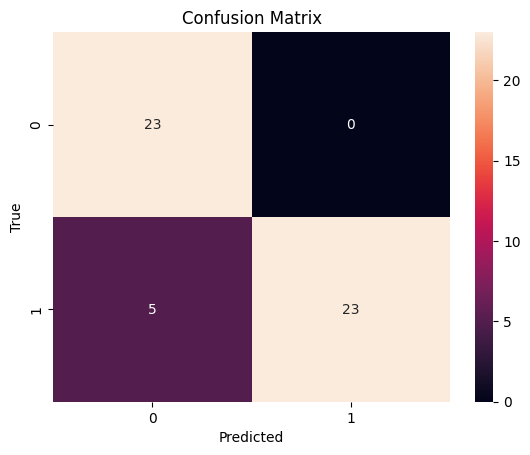

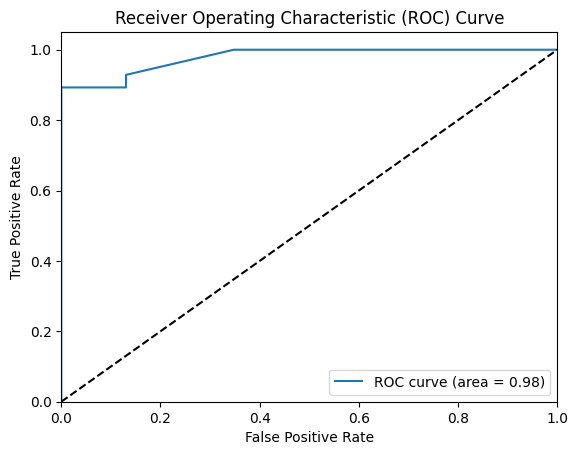

Confusion Matrix and ROC Curve for Gradient Boosting:


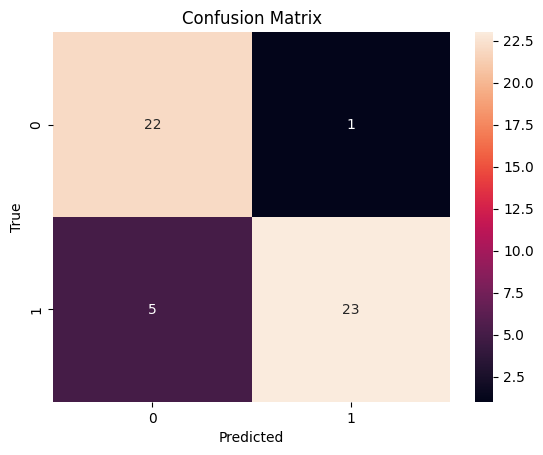

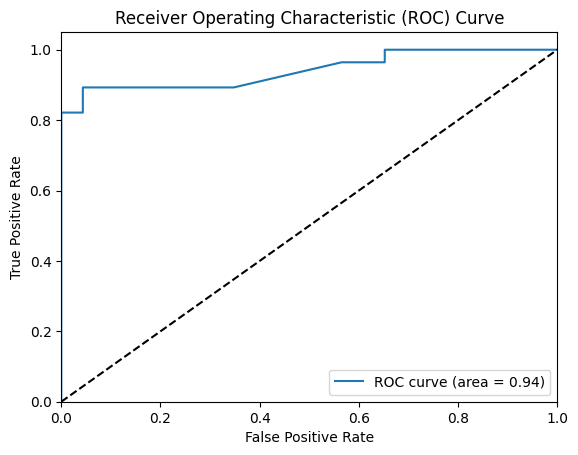

Confusion Matrix and ROC Curve for SVM:


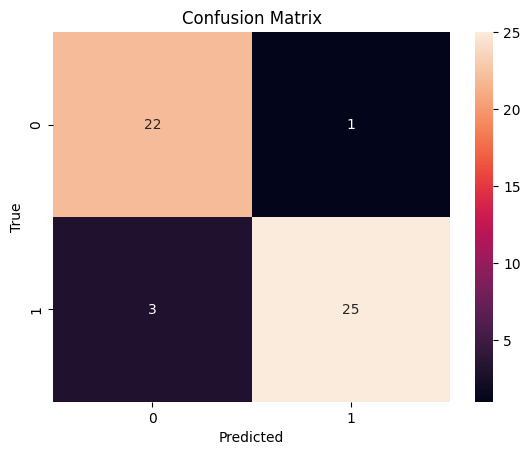

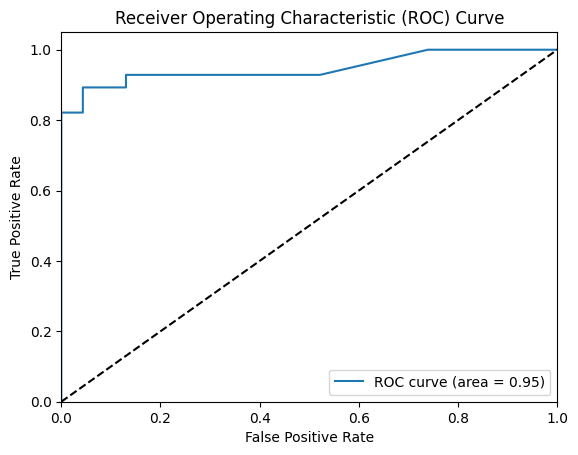

In [ ]:
for name, model in models.items():
    print(f'Confusion Matrix and ROC Curve for {name}:')
    plot_confusion_matrix(model, X_test, Y_test)
    plot_roc_curve(model, X_test, Y_test)

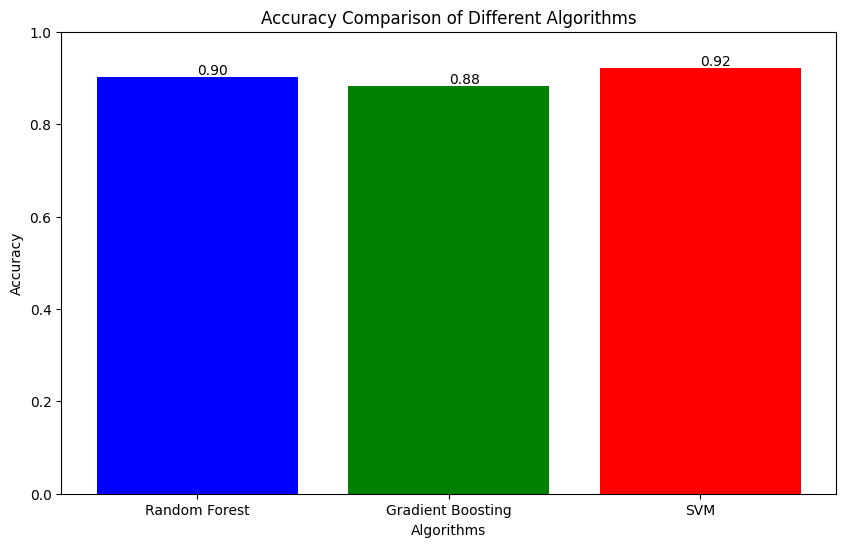

Accuracy Values:
Random Forest: 0.90
Gradient Boosting: 0.88
SVM: 0.92


In [ ]:
import matplotlib.pyplot as plt

# Accuracy values for each algorithm
accuracy_values = {
    'Random Forest': random_forest.score(X_test, Y_test),
    'Gradient Boosting': gradient_boosting.score(X_test, Y_test),
    'SVM': svm.score(X_test, Y_test)
}

# Define colors for each bar
colors = ['blue', 'green', 'red']

# Plotting bar graph with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_values.keys(), accuracy_values.values(), color=colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Adding text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')

plt.show()
# Print accuracy values
print('Accuracy Values:')
for name, accuracy in accuracy_values.items():
    print(f'{name}: {accuracy:.2f}')

# **References:**
Dataset Source: [Diabetes Dataset - Kaggle](https://)

Scikit-Learn Documentation: [Scikit-Learn Documentation](https://)

Pandas Documentation: [Pandas Documentation](https://)

Matplotlib Documentation: [Matplotlib Documentation](https://)

Seaborn Documentation: [Seaborn Documentation](https://)


https://drive.google.com/file/d/1_xGvAS44NNyAf8kQ7EDUsY1-YfVlUez8/view?usp=drive_link


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=9a8b8c3f33fc9da7b910e95b41cd6905c3f438fd1f34f714878289849d5b1bff
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
ERROR: Operation cancelled by user
